# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 



<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.



**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
#reading the initial,unclean, data.
df = pd.read_csv("ab_data.csv")

In [3]:
df.describe()


,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [6]:
# Conversion rate in the whole dataset P_population
conv_rate = df.converted.mean()
conv_rate

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:
# check for inaccurate rows
df_inaccurate = df.query('(group == "treatment" and landing_page != "new_page") or \
                          (group == "control" and landing_page != "old_page")')
df_inaccurate.shape[0]

3893

**f.** Do any of the rows have missing values?

In [8]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.query('(group == "treatment" and landing_page == "new_page") or \
                          (group == "control" and landing_page == "old_page")')
df2.shape[0]

290585

In [10]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [11]:
#checking for duplicate values
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#Get the duplicate user_id
df2.user_id.value_counts().head(1)

773192    2
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [13]:
#Get the records with the same user_id
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [14]:
# Remove one of the rows with a duplicate user_id..
df2 = df2.drop(index = 2893)
# Check again if the row with a duplicate user_id is deleted or not
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

In [15]:
# calculating P_population
conv_rate = df2.converted.mean()
conv_rate

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
conv_rate_control = df2.query('group == "control"').converted.mean()
conv_rate_control

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
conv_rate_treatment = df2.query('group == "treatment"').converted.mean()
conv_rate_treatment

0.11880806551510564

In [18]:
# calculating the difference in conversion rates
obs_diff =conv_rate_treatment -  conv_rate_control
obs_diff

-0.0015782389853555567

 **d.** What is the probability that an individual received the new page?

In [19]:
p_new_page = (df2.landing_page == "new_page").mean()
p_new_page

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>We can see that also treatment group has a very slightly increased probability in our database represented by the probability of new_page,<br>
**The control group has a higer conversion rate.**

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>**$H_0$**: $p_{old}$ >= $p_{new}$<br>
>**$H_1$**: $p_{old}$ < $p_{new}$

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [20]:
p_new = conv_rate
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [21]:
p_old = conv_rate
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [22]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [24]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice(df.query('group == "treatment"').converted, n_new)
new_page_converted

array([1, 0, 0, ..., 0, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [25]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice(df.query('group == "control"').converted, n_old)
old_page_converted

array([0, 0, 1, ..., 0, 0, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [26]:
p_conv_dash = new_page_converted.mean() - old_page_converted.mean()
p_conv_dash

3.2269899827686022e-05


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [27]:
# Sampling distribution 
n_conv_sampling = np.random.binomial(n_new, p_new, 10000)/n_new
o_conv_sampling = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = n_conv_sampling - o_conv_sampling

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

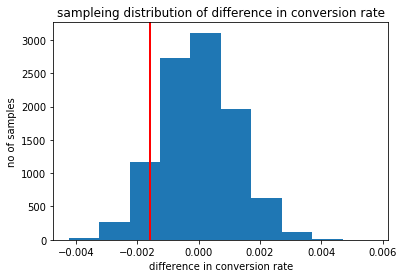

In [28]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color='r', linewidth=2)
plt.title("sampleing distribution of difference in conversion rate")
plt.xlabel("difference in conversion rate")
plt.ylabel("no of samples");

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [29]:
p_diffs = np.array(p_diffs)
null_vals = np.random.normal(0,p_diffs.std(),p_diffs.size)
p_value = (null_vals > obs_diff).mean()
p_value

0.90639999999999998

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>**What i calculated is called the p_value.**

>**<br>This value concludes that we failed to reject the null hypothesis**



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [30]:
import statsmodels.api as sm

old = df2.query('group == "control"')
new = df2.query('group == "treatment"')

# number of conversions with the old_page
convert_old = old.converted.sum()

# number of conversions with the new_page
convert_new = new.converted.sum()

# number of individuals who were shown the old_page
n_old = old.shape[0]

# number of individuals who received new_page
n_new = new.shape[0];

print(convert_old, convert_new, n_old, n_new);

17489 17264 145274 145310


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 
In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.



Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [31]:
#using the proportions_ztest() to double check the obtained results.
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**$Z_{score}$  = -1.31,   Zα  = 1.960  for   α  = 0.05 /confidence level of 95%**

>**Conclusion: Since i used a Righ-tailed test and ( Zscore  <  Zα ) and also the (P_value >  α ), Then we fail to rejcet the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Logistic regression.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [32]:
df2['intercept']=1
df2['ab_page']=pd.get_dummies(df2['group']).treatment
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [33]:
logistic_model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
model = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-18 02:39 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


>**p-value = 0.1899.**<br>
>**P-value** here is a measure for the significance level that a variable has in prediction compared to the baseline.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Other factors like the time of the visit could have a higher significance level in the prediction process.**<br><br>
>**Adding other factors have a disadvantage that the factors could have a high colinearity between them. which would produce wrong results.**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [35]:
# Read the countries.csv
df_countries = pd.read_csv("countries.csv")

In [36]:
# Join with the df2 dataframe
df_merged = df2.merge(df_countries,on ='user_id')
df_merged.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US


In [37]:
# Create the necessary dummy variables
df_merged[['uk','us']] = pd.get_dummies(df_merged['country']).drop('CA', axis =1)

In [38]:
# Fit your model, and summarize the results
logistic_model2 = sm.Logit(df_merged['converted'], df_merged[['intercept','uk','us']])
model2 = logistic_model2.fit();
model2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-18 02:39 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
uk             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
us             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

**Conclusion**: We can see that with country 'CA' as baseline that country 'UK' has a higher significance level than the country 'US' so it would be more important to use it in the model. 

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [39]:
#adding addtional interaction dummy columns 
df_merged['us_ab_page'] = df_merged['us']*df_merged['ab_page']

df_merged['uk_ab_page'] = df_merged['uk']*df_merged['ab_page']

In [40]:
# Fit your model, and summarize the results
logistic_model2 = sm.Logit(df_merged['converted'], df_merged[['intercept','uk','us','us_ab_page','uk_ab_page']])
model2 = logistic_model2.fit();
model2.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-18 02:39 AIC:              212782.3422
No. Observations:   290584           BIC:              212835.2404
Df Model:           4                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
uk             0.0453    0.0306    1.4806  0.1387  -0.0147   0.1053
us             0.0511    0.0277    1.8414  0.0656  -0.0033   0.1054
us_ab_page    -0.0206    0.0137   -1.5052  0.1323  -0.0473   0.0062
uk_ab_page     0.0108    0.0228    0.4749  0.6349  -0.0339   0.0555
==================================================================

"""

>**This summary shows that the country 'US' has a higher significane level and that both the interaction terms are not need in the predection of the vistor's conversionability since both have a low signigicance level.**

# Conclusion:
If we break the test results we would find that:<br>
   - **First** in the probability test the control group with the `old` landing page has a higher conversion rate.
   - **Second** in the A/B test we got a p-value of about 0.9 which is much higher than the 0.05 ${\alpha}$ we choose.
   - **Third** in the Z-test we got a $Z_{score}$ of -1.3 while our $Z_{\alpha}$ was about 1.645.
   - **Fourth**: in the regression model we found that with `old page` as a baseline for the model the `new page` has a low signigicane level in the prediction.

**So as conclusion** we have **failed to reject the null hypothesis** and we see that the old page has a higher significane than the new page when it comes to converting visitors. We also advice **not to implement the new page**.

## Extra time analysis:
For this analysis i will use the timestamp of each visit. First i will analyse the timestamp to check which part of it would be effective in the analysis.

In [41]:
#import datetime 
from datetime import datetime
#conversting timestamp column from string to datetime object to be able to manipulate easily
df['timestamp'] = df.timestamp.apply(datetime.strptime, args=("%Y-%m-%d %H:%M:%S.%f",))

A simple check for the values in the `timestamp` column would show that the data was collected in the same year, `2017`, and the same month, `JAN`,<br>so I will use only the day and hour values as dummy variables in my time analysis.
with using the average hour and day as baselines.

In [42]:
#creating dummy variables from the timestamp column
#First create a separate column for the Day and the Hour
df_time = pd.DataFrame()
df_time['day'] = df.timestamp.apply(lambda x: x.day)
df_time['hour'] = df.timestamp.apply(lambda x: x.hour)

In [43]:
#getting the day with most records to set as baseline,
print(df_time.day.value_counts().head(1))

#getting the hour with most records to set as baseline
print(df_time.hour.value_counts().head(1))

8    13564
Name: day, dtype: int64
16    12438
Name: hour, dtype: int64


In [44]:
#creating the dummy variables after dropping the baseline day & hour
hour_dummies = pd.get_dummies(df_time['hour'], dtype=int).drop(16,axis=1)
hour_dummies.columns = hour_dummies.columns.map(lambda x: str(x)+'_H')

day_dummies = pd.get_dummies(df_time['day'], dtype=int).drop(8,axis=1)
day_dummies.columns = day_dummies.columns.map(lambda x: str(x)+'_D')

df_time = df_time.join(hour_dummies)
df_time = df_time.join(day_dummies)
df_time.drop(['day','hour'],axis=1,inplace=True)
df_time.head(2)

,0_H,1_H,2_H,3_H,4_H,5_H,6_H,7_H,8_H,9_H,...,15_D,16_D,17_D,18_D,19_D,20_D,21_D,22_D,23_D,24_D
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_merged2 = df_merged.join(df_time)
df_merged2.head(2)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,uk,us,...,15_D,16_D,17_D,18_D,19_D,20_D,21_D,22_D,23_D,24_D
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,...,0,0,0,0,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Fit your model, and summarize the results
logistic_model3 = sm.Logit(df_merged2['converted'], df_merged2[['intercept']+df_time.columns.tolist()[:23]])
model3 = logistic_model3.fit();
model3.summary2()

Optimization terminated successfully.
         Current function value: 0.366090
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-18 02:39 AIC:              212808.0637
No. Observations:   290584           BIC:              213061.9752
Df Model:           23               Log-Likelihood:   -1.0638e+05
Df Residuals:       290560           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0085    0.0280  -71.8392  0.0000  -2.0633  -1.9537
0_H            0.0178    0.0397    0.4496  0.6530  -0.0599   0.0956
1_H            0.0012    0.0395    0.0291  0.9768  -0.0763   0.0786
2_H            0.0252    0.0395    0.6386  0.5231  -0.0522   0.1027
3_H           -0.0162    0.0398   -0.4064  0.6844  -0.0941   0.0618
4_H            0.0175    0.0396    0.4421  0.6584  -0.0602   0.0952
5_H            0.0414    0.0392    1.0551  0.2914  -0.0355   0.1183
6_H           -0.0475    0.0401   -1.1843  0.2363  -0.1260   0.0311
7_H           -0.0350    0.0399   -0.8784  0.3797  -0.1131   0.0431
8_H            0.0312    0.0394    0.7925  0.4281  -0.0460   0.1085
9_H            0.0286    0.0395    0.7234  0.4694  -0.0489   0.1061
10_H           0.0010    0.0397    0.0257  0.9795  -0.0767   0.0788
11_H           0.0098    0.0396    0.2481  0.8040  -0.0677   0.0873
12_H           0.0409    0.0393    1.0392  0.2987  -0.0362   0.1179
13_H           0.0188    0.0396    0.4756  0.6343  -0.0588   0.0965
14_H           0.0385    0.0393    0.9796  0.3273  -0.0385   0.1155
15_H           0.0475    0.0395    1.2045  0.2284  -0.0298   0.1249
17_H          -0.0010    0.0396   -0.0249  0.9801  -0.0786   0.0766
18_H           0.0400    0.0394    1.0163  0.3095  -0.0372   0.1172
19_H           0.0208    0.0395    0.5260  0.5989  -0.0566   0.0982
20_H          -0.0270    0.0399   -0.6772  0.4983  -0.1052   0.0512
21_H           0.0009    0.0397    0.0227  0.9819  -0.0769   0.0787
22_H           0.0163    0.0395    0.4131  0.6796  -0.0611   0.0937
23_H           0.0183    0.0395    0.4617  0.6443  -0.0593   0.0958
==================================================================

"""

In [47]:
# Fit your model, and summarize the results
logistic_model4 = sm.Logit(df_merged2['converted'], df_merged2[['intercept']+df_time.columns.tolist()[23:]])
model4 = logistic_model3.fit();
model4.summary2()

Optimization terminated successfully.
         Current function value: 0.366090
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-02-18 02:39 AIC:              212808.0637
No. Observations:   290584           BIC:              213061.9752
Df Model:           23               Log-Likelihood:   -1.0638e+05
Df Residuals:       290560           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0085    0.0280  -71.8392  0.0000  -2.0633  -1.9537
0_H            0.0178    0.0397    0.4496  0.6530  -0.0599   0.0956
1_H            0.0012    0.0395    0.0291  0.9768  -0.0763   0.0786
2_H            0.0252    0.0395    0.6386  0.5231  -0.0522   0.1027
3_H           -0.0162    0.0398   -0.4064  0.6844  -0.0941   0.0618
4_H            0.0175    0.0396    0.4421  0.6584  -0.0602   0.0952
5_H            0.0414    0.0392    1.0551  0.2914  -0.0355   0.1183
6_H           -0.0475    0.0401   -1.1843  0.2363  -0.1260   0.0311
7_H           -0.0350    0.0399   -0.8784  0.3797  -0.1131   0.0431
8_H            0.0312    0.0394    0.7925  0.4281  -0.0460   0.1085
9_H            0.0286    0.0395    0.7234  0.4694  -0.0489   0.1061
10_H           0.0010    0.0397    0.0257  0.9795  -0.0767   0.0788
11_H           0.0098    0.0396    0.2481  0.8040  -0.0677   0.0873
12_H           0.0409    0.0393    1.0392  0.2987  -0.0362   0.1179
13_H           0.0188    0.0396    0.4756  0.6343  -0.0588   0.0965
14_H           0.0385    0.0393    0.9796  0.3273  -0.0385   0.1155
15_H           0.0475    0.0395    1.2045  0.2284  -0.0298   0.1249
17_H          -0.0010    0.0396   -0.0249  0.9801  -0.0786   0.0766
18_H           0.0400    0.0394    1.0163  0.3095  -0.0372   0.1172
19_H           0.0208    0.0395    0.5260  0.5989  -0.0566   0.0982
20_H          -0.0270    0.0399   -0.6772  0.4983  -0.1052   0.0512
21_H           0.0009    0.0397    0.0227  0.9819  -0.0769   0.0787
22_H           0.0163    0.0395    0.4131  0.6796  -0.0611   0.0937
23_H           0.0183    0.0395    0.4617  0.6443  -0.0593   0.0958
==================================================================

"""

### Time analysis conclusion:
The summary shows that almost all of the attributes have no significance level that matters in the prediction process taking into consideration the 0.05 alpha.
>**Note**:
    for the `4_D` column the p-value is about 0.06 which would be significant if we choose and alpha of 0.1 with confidance level of 90%.

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0